In [ ]:
'''
1. Apply a minimum of 4 supervised learning algorithms and fit the model for the training dataset
2. Predict the classes for the test dataset for the same 4 algorithms considered, display the results and plot the same
3. Compare the results of the test data  with respect to the evaluation metrics.
'''

In [16]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [18]:
#knn
def knn(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    #plot
    plotModels(X_train, X_test, y_train, y_test)

    return y_pred

#svm
def svm(X_train, X_test, y_train, y_test):
    svm = SVC(kernel='linear', random_state=0)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return y_pred

#decision tree
def decisionTree(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return y_pred

#random forest
def randomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return y_pred

#logistic regression
def logisticRegression(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(random_state=0)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return y_pred

#function to plot all the models
def plotModels(X_train, X_test, y_train, y_test):
    #plotting the training set
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.title('KNN')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.subplot(2, 2, 2)
    plt.title('SVM')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.subplot(2, 2, 3)
    plt.title('Decision Tree')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.subplot(2, 2, 4)
    plt.title('Random Forest')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

    #plotting the test set
    plt.figure(figsize=(15, 10 ))
    plt.subplot(2, 2, 1)
    plt.title('KNN')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='rainbow')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.subplot(2, 2, 2)
    plt.title('SVM')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='rainbow')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.subplot(2, 2, 3)
    plt.title('Decision Tree')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='rainbow')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.subplot(2, 2, 4)
    plt.title('Random Forest')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='rainbow')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

#function to plot the confusion matrix
def plotConfusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

#function to plot the roc curve
def plotRocCurves(X_train, X_test, y_train, y_test):
    
    y_pred_knn = knn(X_train, X_test, y_train, y_test)
    y_pred_svm = svm(X_train, X_test, y_train, y_test)
    y_pred_dt = decisionTree(X_train, X_test, y_train, y_test)
    y_pred_rf = randomForest(X_train, X_test, y_train, y_test)
    y_pred_lr = logisticRegression(X_train, X_test, y_train, y_test)

    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn )
    fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm )
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt )
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf )
    fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr )

    plt.figure(figsize=(10, 7))
    plt.plot(fpr_knn, tpr_knn, label='KNN')
    plt.plot(fpr_svm, tpr_svm, label='SVM')
    plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
    plt.plot(fpr_rf, tpr_rf, label='Random Forest')
    plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


#main
def main():
    #importing dataset
    dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
    X = dataset.iloc[:, [2, 3]].values
    y = dataset.iloc[:, 4].values

    #splitting dataset into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    #feature scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    #knn
    y_pred = knn(X_train, X_test, y_train, y_test)

    #svm
    y_pred = svm(X_train, X_test, y_train, y_test)

    #decision tree
    y_pred = decisionTree(X_train, X_test, y_train, y_test)

    #random forest
    y_pred = randomForest(X_train, X_test, y_train, y_test)

    #logistic regression
    y_pred = logisticRegression(X_train, X_test, y_train, y_test)

    #plotting the confusion matrix
    plotConfusionMatrix(y_test, y_pred)

    #plotting the roc curve
    plotRocCurves(X_train, X_test, y_train, y_test)

    #plotting the models
    plotModels(X_train, X_test, y_train, y_test)

    

[[64  4]
 [ 3 29]]
0.93
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



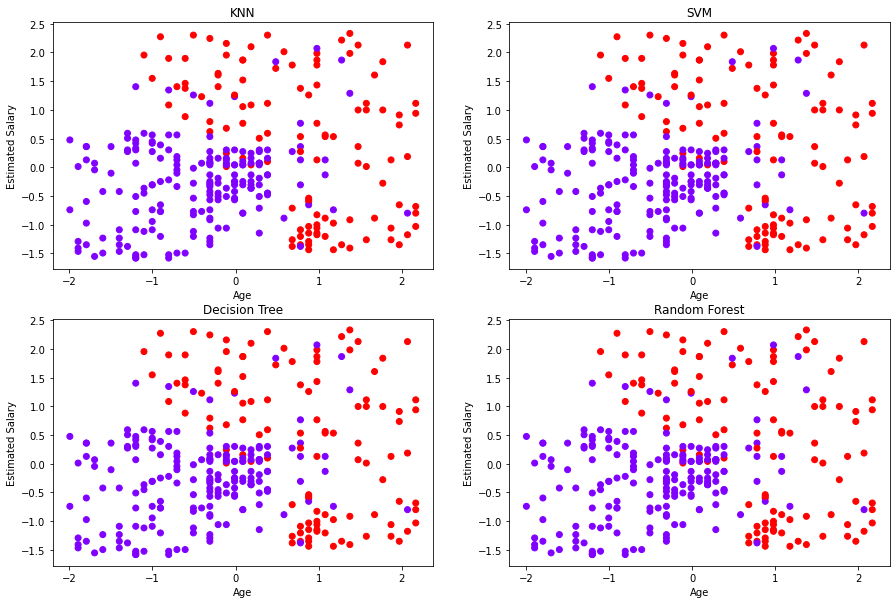

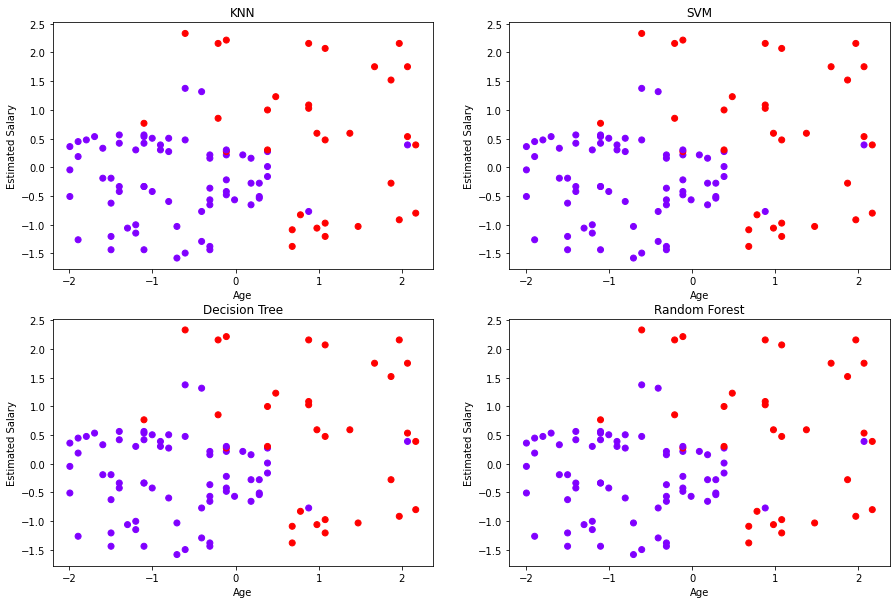

[[66  2]
 [ 8 24]]
0.9
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100

[[62  6]
 [ 3 29]]
0.91
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100

[[63  5]
 [ 4 28]]
0.91
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
wei

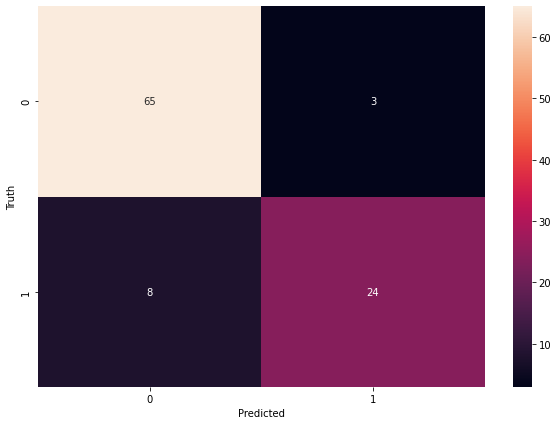

[[64  4]
 [ 3 29]]
0.93
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



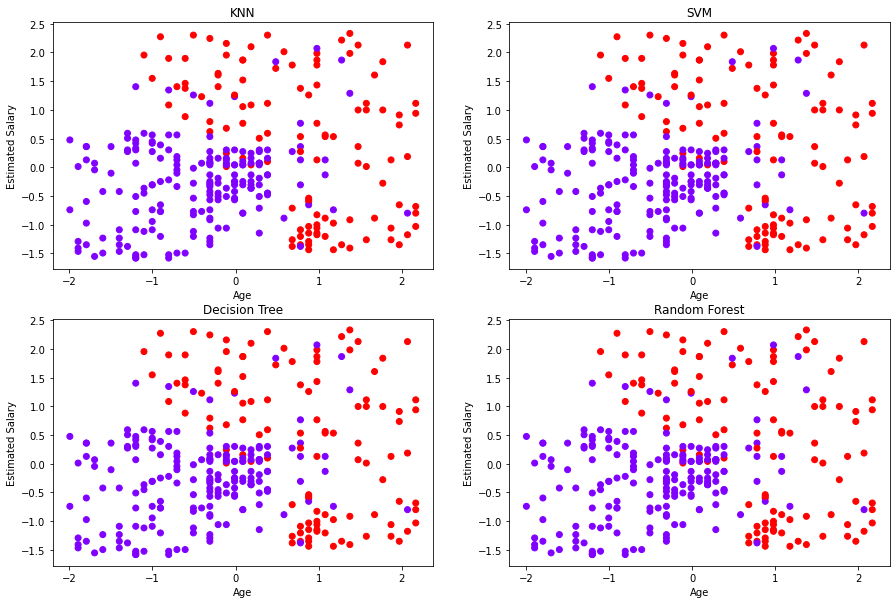

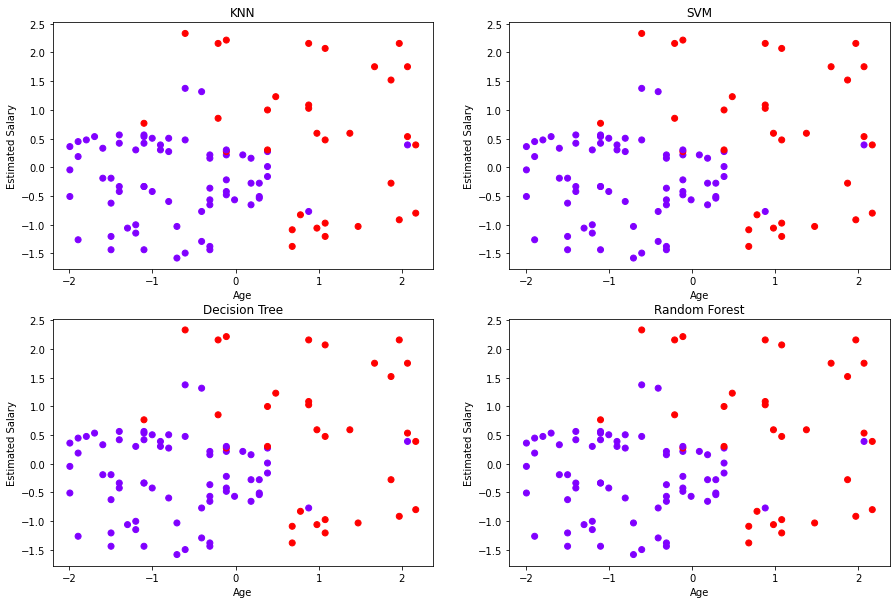

[[66  2]
 [ 8 24]]
0.9
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100

[[62  6]
 [ 3 29]]
0.91
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100

[[63  5]
 [ 4 28]]
0.91
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
wei

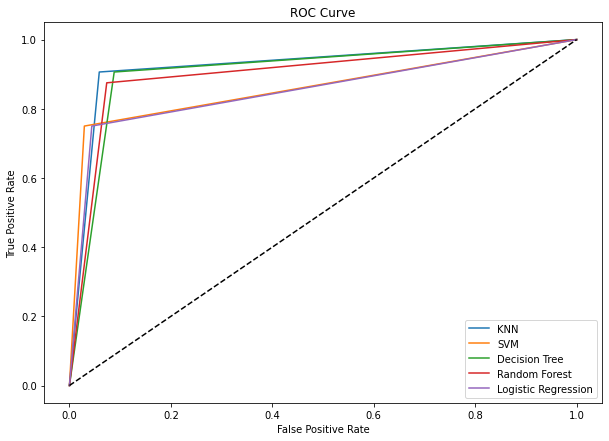

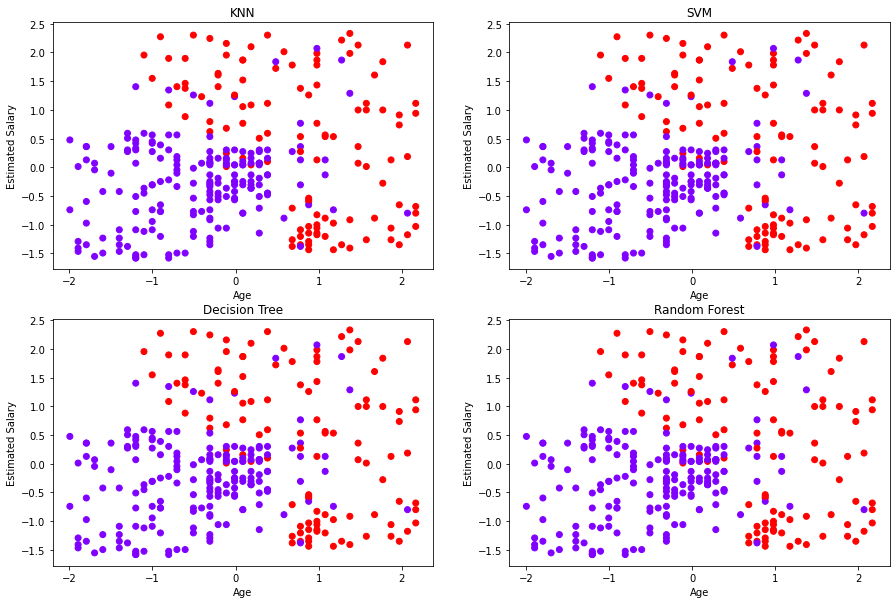

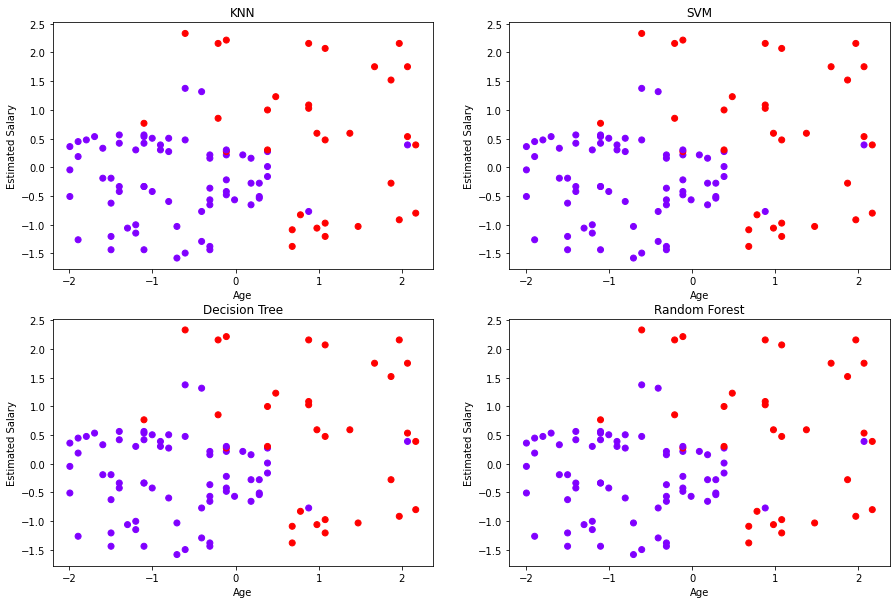

In [19]:
main()